# Anthocyanen uit Druiven als conserveermiddel?

- Author: Jurre Hageman
- Date: 2022-11-30
- Version: 2022-11-30

# Inleiding

Anthocyanen zijn in water oplosbare flavonoïden. Anthocyanen hebben een diverse functie in planten. Ze lokken insecten zoals bijen voor bestuiving maar ze hebben ook antioxidant en antimicrobiële eigenschappen.
Hoewel anthocyanen in de Europese Unie zijn goedgekeurd als kleurstof voor voedingsmiddelen en dranken, zijn ze nog niet goedgekeurd voor gebruik als voedseladditief omdat ze niet als veilig zijn geverifieerd bij gebruik als voedsel- of supplementingrediënten.
Het bedrijf waar ik mee samenwerk (projectpartner) wil anthocyanen gebruiken als voedseladditief in voedingsmiddelen om bacteriebederf tegen te gaan. 
Er heeft een laboratoriumonderzoek plaatsgevonden waarbij de groei van een bacterie is onderzocht in media met verschillende concentraties anthocyanen uit rode en groene druiven.

## Onderzoeksvraag

Werken anthocyanen uit rode druiven of groene druiven antimicrobieel?

## Het experiment

Anthocyanen zijn uit rode en groene druiven geextraheerd. Daarna is een experiment ingezet om te testen of de anthocyanen ingezet kunnen worden als conserveringsmiddel.

## Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import os
from IPython.display import Image

# Plate setup

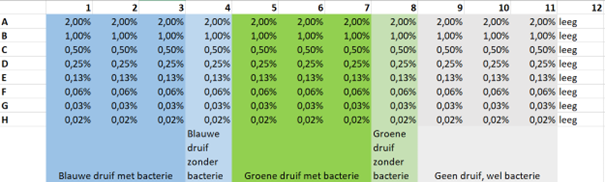

In [2]:
plate_setup_dest = os.path.join("pics", "plate_setup.png")
Image(filename=plate_setup_dest) 

## User Settings

In [3]:
# Folder & File settings:
# Filetype is utf8 csv from Excel export
folder = 'sample_data'
file_name = '2020-01-30.csv'

# Experiment settings:
organism = 'Bacterie'
conc_start = 2.0
conc_end = 0
tubes = 8
tube_names = "A,B,C,D,E,F,G,H" # For user convenience, type a string (data comma-seperated)
fold_dillution = 2
accuracy = 3 #number of digits
sample = 'Rode druif,Groene druif,Negatieve controle' # For user convenience, type a string (data comma-seperated)


# Visualization settings
linecolors = "#FF3633,#FF8933,#FCFF33,#62FF33,#33FFEB,#33A7FF,#5F33FF,#EA33FF"
headers = 'time (min),sample,replicate,conc (%),OD S,OD B'

## Transform user settings

In [4]:
# manipulate user data
if type(tube_names) == str:
    tube_names = tube_names.split(',')
if type(sample) == str:
    sample = sample.split(',')
if type(linecolors) == str:
    linecolors = linecolors.split(',')
if type(headers) == str:
    headers = headers.split(',')

# pretty print the dataframe
def pprint_df(df):
    print(df.to_string())


def generate_dill_series(conc_start, conc_end, fold_dillution, tubes, accuracy):
    dillution_series = {}
    num = conc_start
    for i in range(tubes - 1):  
        dillution_series[tube_names[i]] = round(num, accuracy)
        num /= fold_dillution
    dillution_series[tube_names[i + 1]] = round(conc_end, accuracy)
    return dillution_series

concentrations =  generate_dill_series(conc_start, conc_end, fold_dillution, tubes, accuracy)

colors_tubeletters = dict(zip(tube_names, linecolors))
colors = {concentrations[i]:j for (i, j) in colors_tubeletters.items()}

## Read the data

In [5]:
def read_data(folder, file_name):
    file_path = os.path.join(folder, file_name)
    with open(file_path) as f:
        time = 0
        matrix = []
        row = None
        for line in (f):
            line = line.strip().split(';')
            if line[0] == "Value":
                row = 0
                time += 10
            if row != None and row > 0 and row < 9:
                row_letter = line[0]
                nums = line[1:13]
                nums = [float(i.replace(',', '.')) for i in nums]
                for i in range(3):
                    replicate = i + 1
                    sample1 = [time - 10, sample[0], replicate, concentrations[row_letter], nums[i], nums[3]]
                    sample2 = [time - 10, sample[1], replicate, concentrations[row_letter], nums[i + 4], nums[7]]
                    sample3 = [time - 10, sample[2], replicate, concentrations[row_letter], nums[i + 8], nums[11]]
                    matrix.append(sample1)
                    matrix.append(sample2)
                    matrix.append(sample3)
            if row != None:
                row += 1
        df = pd.DataFrame.from_records(matrix)
        df.columns = headers
        return df
            
            

df = read_data(folder, file_name)
#print(df.head())

## Calulations on data

In [6]:
# Substract the Blanc
df['OD corr'] = df['OD S'] - df['OD B']
#print(df.head())

## Categorize the data

In [7]:
# select samples:
sample1 = df.loc[df['sample'] == sample[0]]
sample2 = df.loc[df['sample'] == sample[1]]
sample3 = df.loc[df['sample'] == sample[2]]

title_sample1 = "{} ({}) file: {}".format(sample[0], organism, file_name)
title_sample2 = "{} ({}) file: {}".format(sample[1], organism, file_name)
title_sample3 = "{} ({}) file: {}".format(sample[2], organism, file_name)

## Plotting the data: Line plot with translucent error bands

Text(0.5, 1.0, 'Negatieve controle (Bacterie) file: 2020-01-30.csv')

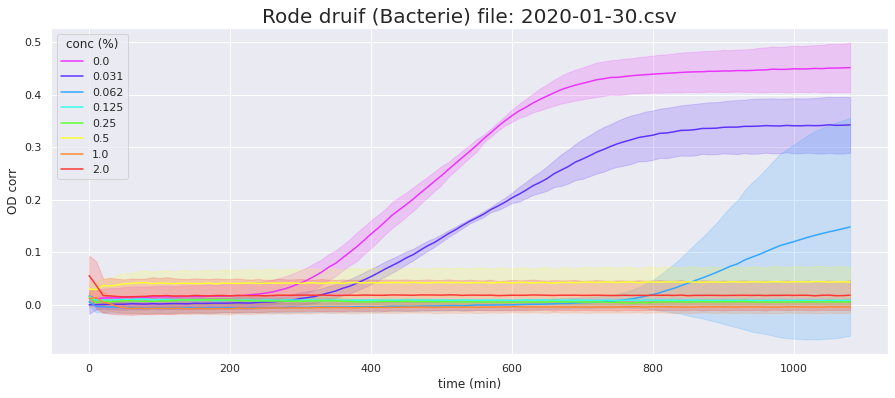

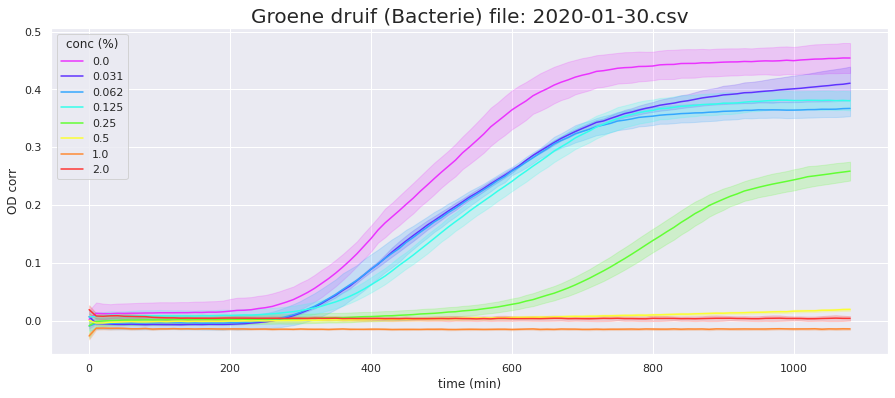

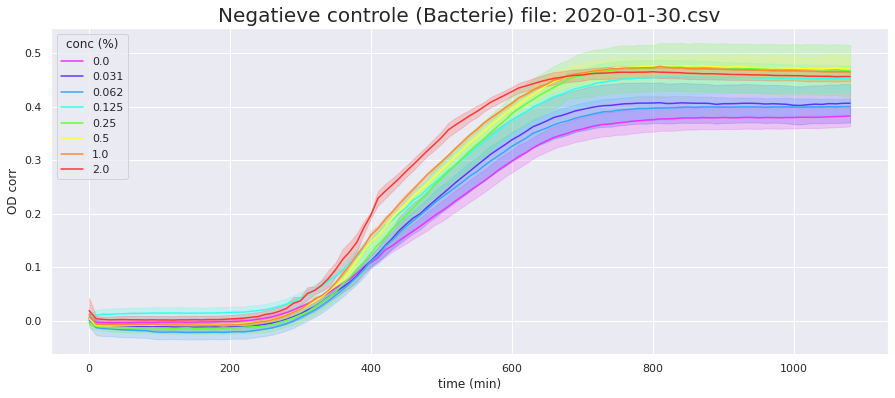

In [8]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample1, x='time (min)', y='OD corr', errorbar='sd', hue='conc (%)', palette=colors)
ax.set_title(title_sample1, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample2, x='time (min)', y='OD corr', errorbar='sd', hue='conc (%)', palette=colors)
ax.set_title(title_sample2, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample3, x='time (min)', y='OD corr', errorbar='sd', hue='conc (%)', palette=colors)
ax.set_title(title_sample3, fontsize=20)

## Plotting the data: Line plot with discrete error bars

Text(0.5, 1.0, 'Negatieve controle (Bacterie) file: 2020-01-30.csv')

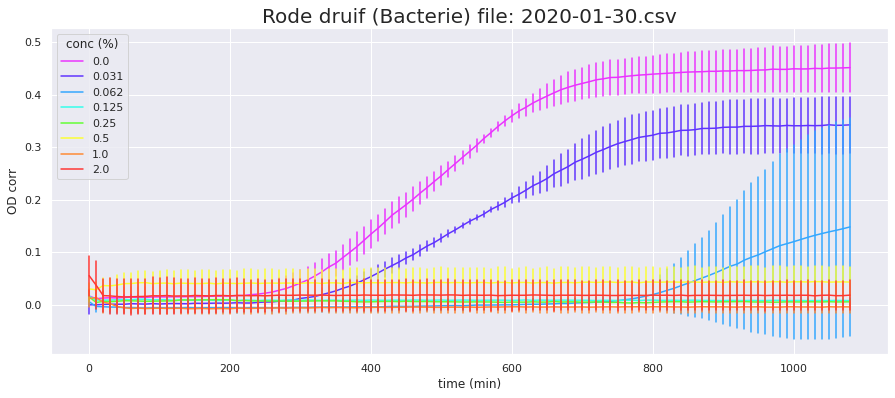

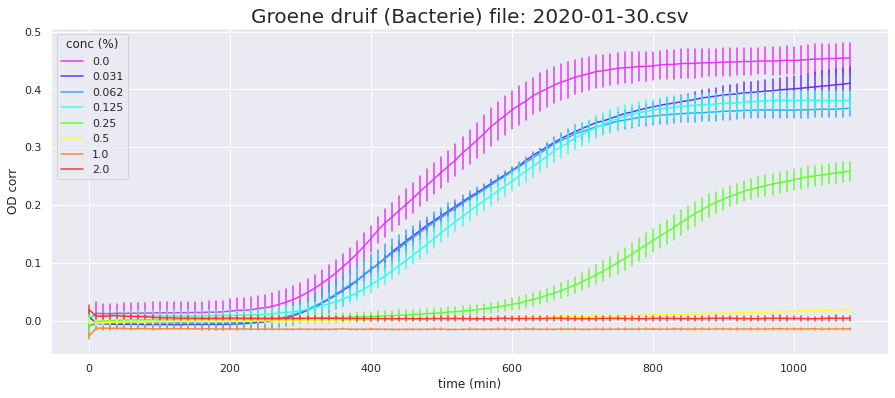

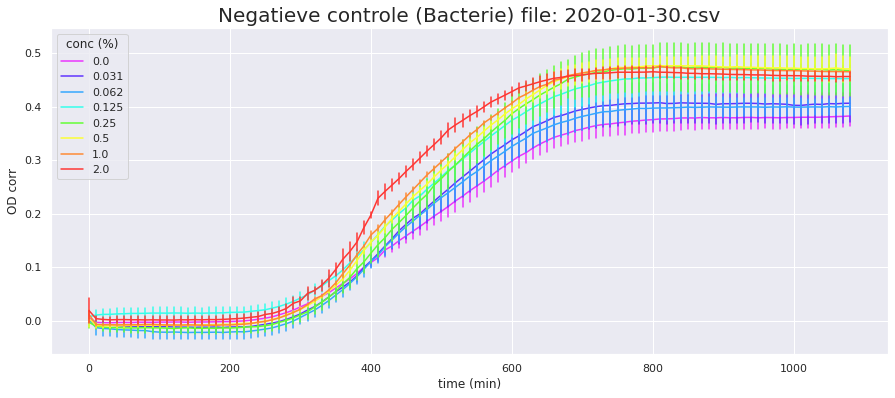

In [9]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample1, x='time (min)', y='OD corr', errorbar='sd', err_style='bars', hue='conc (%)', palette=colors)
ax.set_title(title_sample1, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample2, x='time (min)', y='OD corr', errorbar='sd', err_style='bars', hue='conc (%)', palette=colors)
ax.set_title(title_sample2, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample3, x='time (min)', y='OD corr', errorbar='sd', err_style='bars', hue='conc (%)', palette=colors)
ax.set_title(title_sample3, fontsize=20)

## Plotting the data: Lineplot with markers and discrete error bars

Text(0.5, 1.0, 'Negatieve controle (Bacterie) file: 2020-01-30.csv')

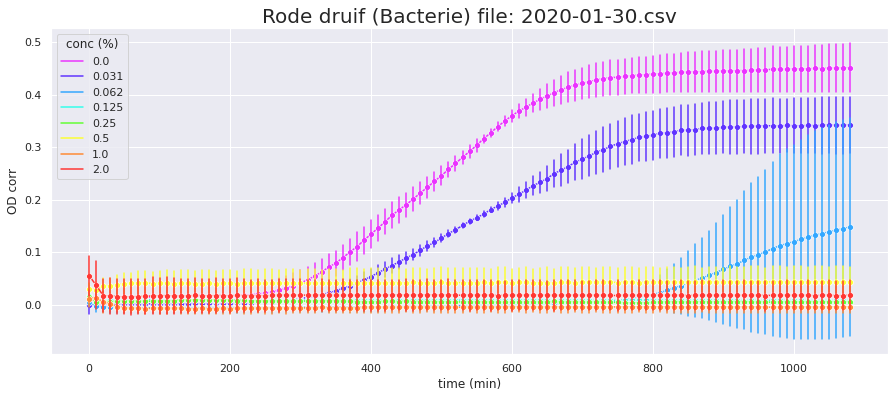

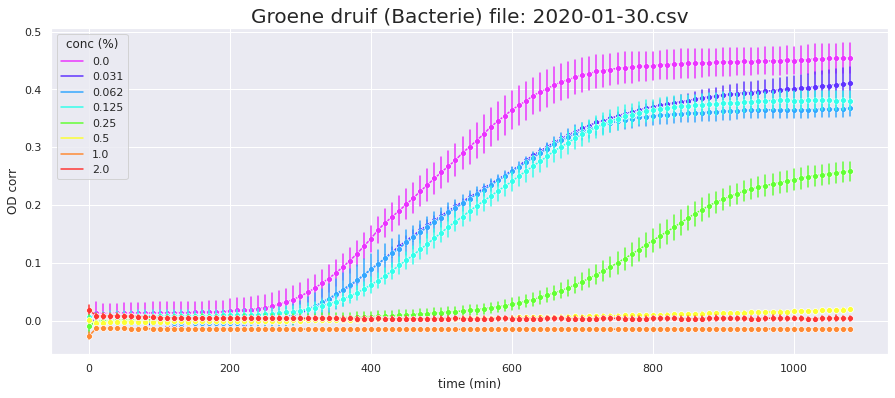

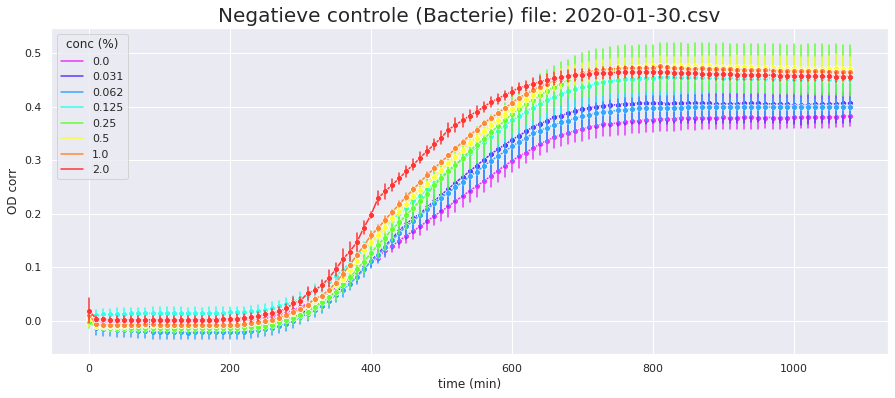

In [10]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample1, x='time (min)', y='OD corr', errorbar='sd', err_style='bars', hue='conc (%)', palette=colors, marker='o')
ax.set_title(title_sample1, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample2, x='time (min)', y='OD corr', errorbar='sd', err_style='bars', hue='conc (%)', palette=colors, marker='o')
ax.set_title(title_sample2, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample3, x='time (min)', y='OD corr', errorbar='sd', err_style='bars', hue='conc (%)', palette=colors, marker='o')
ax.set_title(title_sample3, fontsize=20)

## Plotting the data: scatter

Text(0.5, 1.0, 'Negatieve controle (Bacterie) file: 2020-01-30.csv')

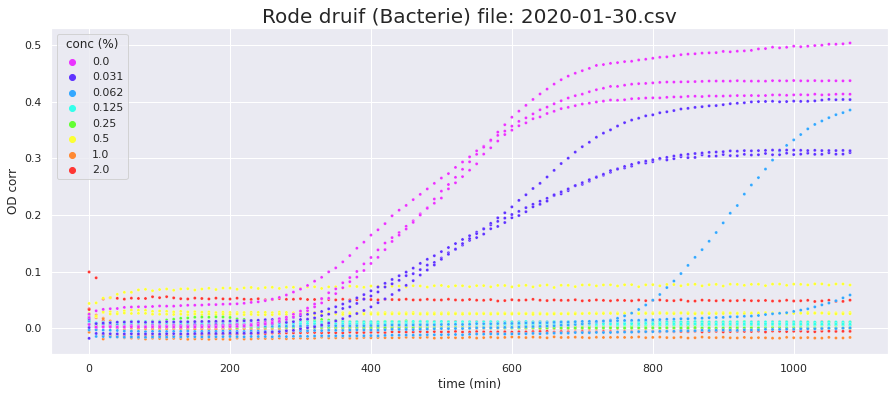

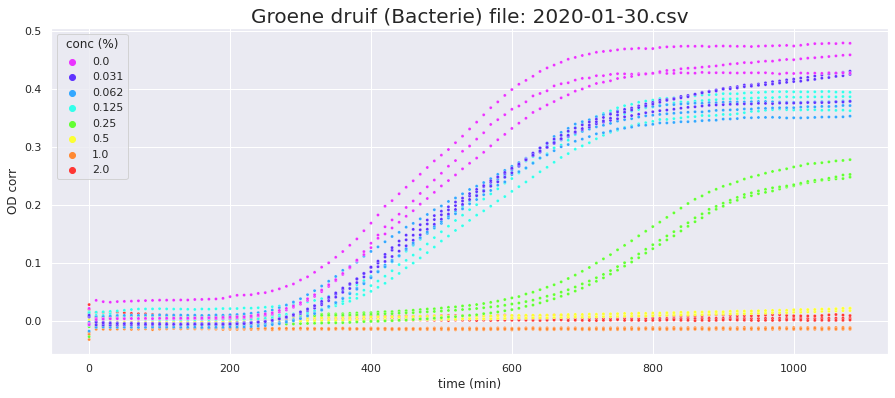

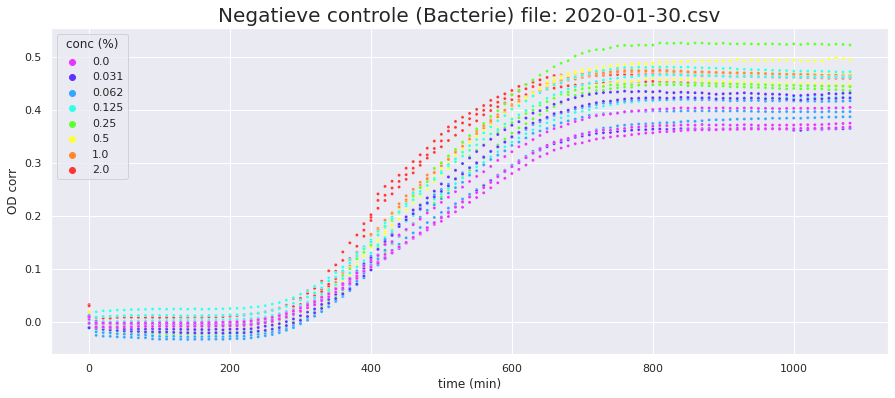

In [11]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="time (min)", y="OD corr", hue="conc (%)", data=sample1, palette=colors, s=10)
ax.set_title(title_sample1, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="time (min)", y="OD corr", hue="conc (%)", data=sample2, palette=colors, s=10)
ax.set_title(title_sample2, fontsize=20)

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="time (min)", y="OD corr", hue="conc (%)", data=sample3, palette=colors, s=10)
ax.set_title(title_sample3, fontsize=20)

## Plotting the data: Controls

[(0.0, 0.5)]

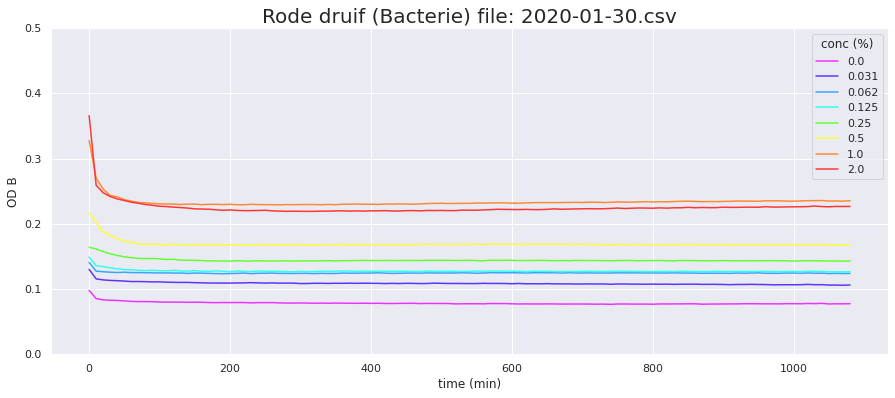

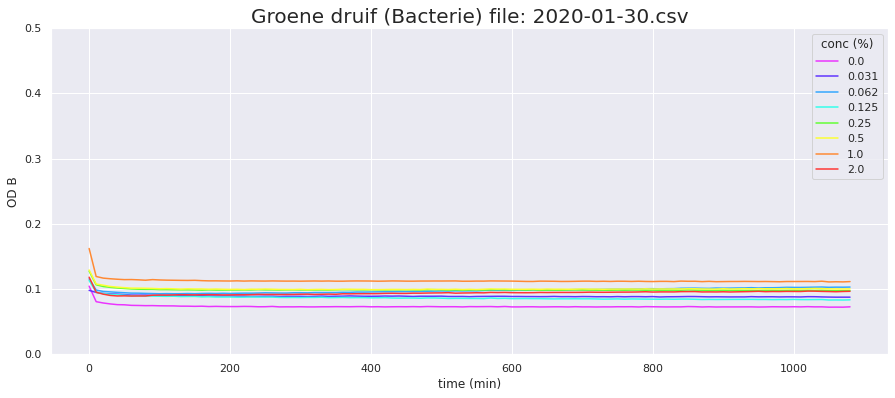

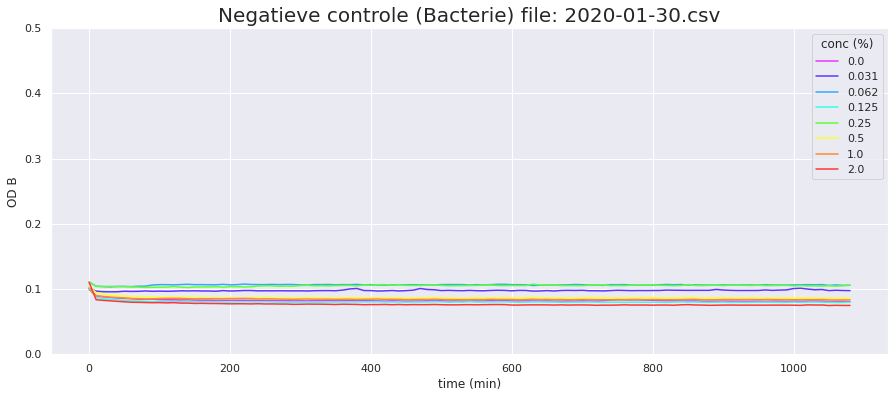

In [12]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample1, x='time (min)', y='OD B', errorbar=None, hue='conc (%)', palette=colors)
ax.set_title(title_sample1, fontsize=20)
ax.set(ylim=(0, 0.5))

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample2, x='time (min)', y='OD B', errorbar=None, hue='conc (%)', palette=colors)
ax.set_title(title_sample2, fontsize=20)
ax.set(ylim=(0, 0.5))

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=sample3, x='time (min)', y='OD B', errorbar=None, hue='conc (%)', palette=colors)
ax.set_title(title_sample3, fontsize=20)
ax.set(ylim=(0, 0.5))

# Conclusie

De steriliteitscontroles zijn allemaal negatief voor bacteriegroei.

Uit de data blijkt verder dat de anthocyanen van de rode druif het sterkst antimicrobieel werken. De groene druif werkt ook antimicrobieel maar de negatieve controle niet. Er is een duidelijke dosis-afhankelijke remming van de groei waar te nemen bij de anthocyanen van de rode en de groene druif.

The end...